In [12]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()
from fastbook import *
from fastai.vision.widgets import *
key = os.environ.get('AZURE_SEARCH_KEY', 'e5ba30c3cde4424f82bb049537d6556a')
path= Path('/storage/Personal/faces')
face_types=('happy','sad','angry')
path=Path('/storage/Personal/faces')
if not path.exists():
    path.mkdir()
    for o in face_types:
        dest=(path/o)
        dest.mkdir(exist_ok=True)
        results=search_images_bing(key, f'{o} human face')
        download_images (dest, urls=results.attrgot('content_url'))

In [13]:
fns= get_image_files(path)
fns

(#443) [Path('/storage/Personal/faces/angry/00000141.jpg'),Path('/storage/Personal/faces/angry/00000083.jpg'),Path('/storage/Personal/faces/angry/00000101.jpg'),Path('/storage/Personal/faces/angry/00000008.jpg'),Path('/storage/Personal/faces/angry/00000096.jpg'),Path('/storage/Personal/faces/angry/00000123.jpg'),Path('/storage/Personal/faces/angry/00000143.gif'),Path('/storage/Personal/faces/angry/00000148.jpg'),Path('/storage/Personal/faces/angry/00000037.jpg'),Path('/storage/Personal/faces/angry/00000035.jpg')...]

In [14]:
failed=verify_images(fns)
failed

(#5) [Path('/storage/Personal/faces/angry/00000122.jpeg'),Path('/storage/Personal/faces/happy/00000143.jpg'),Path('/storage/Personal/faces/happy/00000032.jpg'),Path('/storage/Personal/faces/sad/00000072.jpg'),Path('/storage/Personal/faces/sad/00000147.jpg')]

In [15]:
failed.map(Path.unlink);

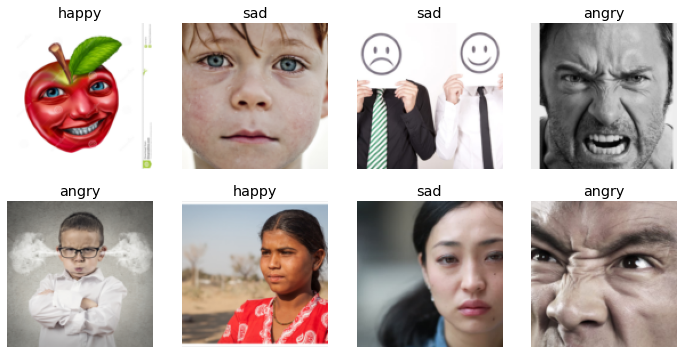

In [16]:
faces=DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))
dls=faces.dataloaders(path)
dls.valid.show_batch(max_n=8, nrows=2)

In [17]:
faces=faces.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls=faces.dataloaders(path)
learn=cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

epoch,train_loss,valid_loss,error_rate,time
0,2.076457,1.595245,0.632184,00:06


/opt/conda/envs/fastai/lib/python3.8/site-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/opt/conda/envs/fastai/lib/python3.8/site-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


epoch,train_loss,valid_loss,error_rate,time
0,1.502868,1.261299,0.459770,00:06
1,1.384905,1.186227,0.436782,00:07
2,1.218393,1.171031,0.379310,00:07
3,1.151320,1.166941,0.356322,00:06


/opt/conda/envs/fastai/lib/python3.8/site-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/opt/conda/envs/fastai/lib/python3.8/site-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/opt/conda/envs/fastai/lib/python3.8/site-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/opt/conda/envs/fastai/lib/python3.8/site-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/opt/conda/envs/fastai/lib/python3.8/site-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/opt/conda/envs/fastai/lib/python3.8/site-packages/PIL/Image.py:960: U

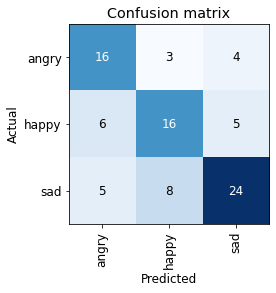

In [18]:
interp= ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

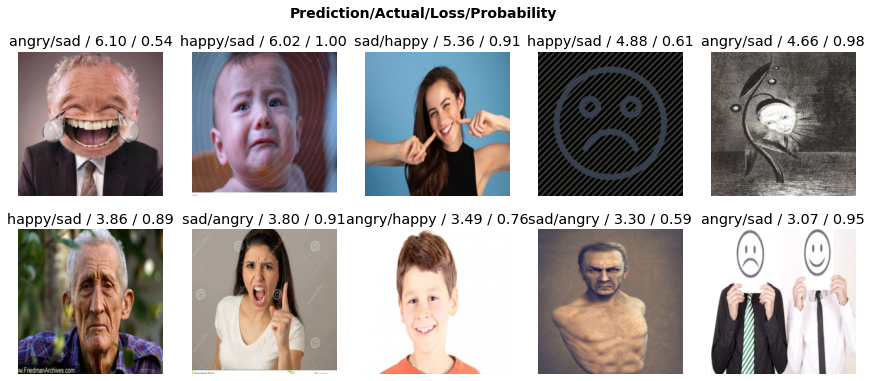

In [19]:
interp.plot_top_losses(10, nrows=2)

In [20]:
cleaner=ImageClassifierCleaner(learn)
cleaner

/opt/conda/envs/fastai/lib/python3.8/site-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/opt/conda/envs/fastai/lib/python3.8/site-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [22]:
for idx in cleaner.delete(): cleaner.fns[idx].unlink()
for idx,cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]), path/cat)

In [23]:
learn.export()
path=Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

In [24]:
learn_inf= load_learner(path/'export.pkl')

In [25]:
learn_inf.dls.vocab

(#3) ['angry','happy','sad']